# Face Identification Model using FaceNet in Keras

Face identification is a computer vision task of identifying a person based on a photograph of their face.

Required Data Link: https://bit.ly/3ikw53y

# 1.Face Detection

The Face detection method is used to find the faces present in the image, extract the faces, and display it (or create a compressed file to use it further for feature extraction).

##### We will be using MTCNN

### Import required libraries

In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from PIL import Image 
from numpy import savez_compressed
from numpy import asarray
from os import listdir
from mtcnn.mtcnn import MTCNN

### 1.1 Method to extract Face

In [2]:
def extract_image(image):
    img1 = Image.open(image)            #open the image
    img1 = img1.convert('RGB')          #convert the image to RGB format 
    pixels = asarray(img1)              #convert the image to numpy array
    detector = MTCNN()                  #assign the MTCNN detector
    f = detector.detect_faces(pixels)
    #fetching the (x,y)co-ordinate and (width-->w, height-->h) of the image
    x1,y1,w,h = f[0]['box']             
    x1, y1 = abs(x1), abs(y1)
    x2 = abs(x1+w)
    y2 = abs(y1+h)
    #locate the co-ordinates of face in the image
    store_face = pixels[y1:y2,x1:x2]
    plt.imshow(store_face)
    image1 = Image.fromarray(store_face,'RGB')    #convert the numpy array to object
    image1 = image1.resize((160,160))             #resize the image
    face_array = asarray(image1)                  #image to array
    return face_array

### 1.2 Method to fetch the face

In [3]:
def load_faces(directory):
    face = []
    i=1
    for filename in listdir(directory):
        path = directory + filename
        faces = extract_image(path)
        face.append(faces)
    return face

### 1.3 Method to get the array of face data(trainX) and it's labels(trainY)

In [4]:
def load_dataset(directory):
    x, y = [],[]
    i=1
    for subdir in listdir(directory):
        path = directory + subdir + '/'
        #load all faces in subdirectory
        faces = load_faces(path)
        #create labels
        labels = [subdir for _ in range(len(faces))]
        #summarize
        print("%d There are %d images in the class %s:"%(i,len(faces),subdir))
        x.extend(faces)
        y.extend(labels)
        i=i+1
    return asarray(x),asarray(y)

### 1.4 load the datasets

In [5]:
BASE = ''

W0116 13:37:43.104466 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeca44631e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:37:43.190455 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeca44631e0> triggered tf.function retracing.

W0116 13:37:46.814024 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd97cd598> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:37:47.694658 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd927a378> triggered tf.function retracing.

W0116 13:37:52.417706 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd88d7b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:37:53.237764 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aebbc6361e0> triggered tf.function retracing.

1 There are 15 images in the class Aamir_Khan:


W0116 13:37:56.108677 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeca4472598> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:37:56.204545 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeca4472598> triggered tf.function retracing.

W0116 13:38:01.936105 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aebbc636620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:38:02.773647 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd8ac81e0> triggered tf.function retracing.

W0116 13:38:06.813666 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd983a158> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:38:07.820711 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecdbf90bf8> triggered tf.function retracing.

2 There are 15 images in the class Abhay_Deol:


W0116 13:38:10.353459 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd8903e18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:38:10.454627 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd8903e18> triggered tf.function retracing.

W0116 13:38:15.336656 47190165414976 def_function.py:120] 6 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeca4c9a7b8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:38:16.232040 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed442e9a60> triggered tf.function retracing.

W0116 13:38:20.852301 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed44ede598> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:38:20.933659 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed44ede598> triggered tf.function retracing.

3 There are 15 images in the class Abhishek_Bachchan:


W0116 13:38:25.129559 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd8b967b8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:38:26.077381 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecda24ca60> triggered tf.function retracing.

W0116 13:38:30.878227 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed4588b0d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:38:31.780193 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed45e73158> triggered tf.function retracing.

W0116 13:38:35.715358 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed476fc8c8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:38:36.498840 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed477296a8> triggered tf.function retracing.

4 There are 15 images in the class Aftab_Shivdasani:


W0116 13:38:39.107410 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd8b96bf8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:38:39.195817 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd8b96bf8> triggered tf.function retracing.

W0116 13:38:51.208177 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecdbf93c80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:38:52.289071 47190165414976 def_function.py:120] 5 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed45b59400> triggered tf.function retracing.

5 There are 15 images in the class Aishwarya_Rai:


W0116 13:38:58.969256 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed47e44d08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:38:59.047224 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed47e44d08> triggered tf.function retracing.

W0116 13:39:04.805380 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7d416620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:39:04.879379 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7d416620> triggered tf.function retracing.

W0116 13:39:08.715397 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7d356510> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:39:09.219178 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed46a8a598> triggered tf.function retracing.

6 There are 15 images in the class Ajay_Devgn:


W0116 13:39:13.781160 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed47eea730> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:39:13.863775 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed47eea730> triggered tf.function retracing.

W0116 13:39:18.436027 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7f184400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:39:18.687294 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed47d19d08> triggered tf.function retracing.

W0116 13:39:22.625356 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7ef00d08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:39:22.705178 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7ef00d08> triggered tf.function retracing.

7 There are 15 images in the class Akshaye_Khanna:


W0116 13:39:27.418786 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeca4c9a1e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:39:28.322466 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd983a7b8> triggered tf.function retracing.

W0116 13:39:33.200910 47190165414976 def_function.py:120] 5 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7e2d41e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:39:33.287360 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7e2d41e0> triggered tf.function retracing.

W0116 13:39:38.450825 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed458b8d08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:39:39.407524 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed47e441e0> triggered tf.function retracing.

8 There are 15 images in the class Akshay_Kumar:


W0116 13:39:41.958670 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7f534f28> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:39:42.046373 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7f534f28> triggered tf.function retracing.

W0116 13:39:50.859364 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9f199950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:39:51.136935 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed4481e6a8> triggered tf.function retracing.

9 There are 15 images in the class Alia_Bhatt:


W0116 13:39:57.872777 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9ca74378> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:39:57.963292 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9ca74378> triggered tf.function retracing.

W0116 13:40:04.223922 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecda20e158> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:40:05.278812 47190165414976 def_function.py:120] 5 out of the last 33 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7d90a488> triggered tf.function retracing.

W0116 13:40:13.536142 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed47cea048> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:40:14.521981 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed47d19c80> triggered tf.function retracing.

10 There are 15 images in the class Ameesha_Patel:


W0116 13:40:15.414000 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed47e10ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:40:16.191169 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecdaf71840> triggered tf.function retracing.

W0116 13:40:24.913651 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9f0e9488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:40:25.000462 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9f0e9488> triggered tf.function retracing.

W0116 13:40:29.952983 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7c5b9b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:40:30.032201 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7c5b9b70> triggered tf.function retracing.

11 There are 15 images in the class Amitabh_Bachchan:


W0116 13:40:32.964911 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9fdc0840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:40:33.922223 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9c4670d0> triggered tf.function retracing.

W0116 13:40:39.191219 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecdaf466a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:40:39.275880 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecdaf466a8> triggered tf.function retracing.

12 There are 15 images in the class Amrita_Rao:


W0116 13:40:47.019104 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedadb93bf8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:40:47.093504 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedadb93bf8> triggered tf.function retracing.

W0116 13:40:54.205117 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedaf896b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:40:55.063405 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee258c2ae8> triggered tf.function retracing.

W0116 13:40:58.848104 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7e7122f0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:40:59.784080 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aec27e9b620> triggered tf.function retracing.

13 There are 15 images in the class Amy_Jackson:


W0116 13:41:04.129673 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7d75f6a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:41:05.334268 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7f534488> triggered tf.function retracing.

W0116 13:41:13.567671 47190165414976 def_function.py:120] 5 out of the last 26 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee26783268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:41:14.776014 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedaf452378> triggered tf.function retracing.

14 There are 15 images in the class Anil_Kapoor:


W0116 13:41:21.192406 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9f0e9e18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:41:21.289846 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9f0e9e18> triggered tf.function retracing.

W0116 13:41:28.206657 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedaef68510> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:41:28.710027 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecdaf71ea0> triggered tf.function retracing.

W0116 13:41:33.790191 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedacab66a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:41:34.050213 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9ff9a7b8> triggered tf.function retracing.

15 There are 15 images in the class Anushka_Sharma:


W0116 13:41:36.477004 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedace73a60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:41:37.518658 47190165414976 def_function.py:120] 5 out of the last 22 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee25de57b8> triggered tf.function retracing.

W0116 13:41:44.455943 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee259f7378> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:41:45.426045 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee265fdbf8> triggered tf.function retracing.

16 There are 15 images in the class Anushka_Shetty:


W0116 13:41:52.473053 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedacfaae18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:41:52.564268 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedacfaae18> triggered tf.function retracing.

W0116 13:41:58.345226 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedaee47950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:41:59.460645 47190165414976 def_function.py:120] 5 out of the last 21 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9d63f510> triggered tf.function retracing.

W0116 13:42:06.290569 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed460da268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


17 There are 15 images in the class Arjun_Kapoor:


W0116 13:42:07.092669 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9d0e09d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:42:07.176661 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9d0e09d8> triggered tf.function retracing.

W0116 13:42:12.071703 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee27047d90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:42:12.544431 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee27047d08> triggered tf.function retracing.

W0116 13:42:17.072797 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3a0ca1e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:42:17.886129 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3af657b8> triggered tf.function retracing.

18 There are 15 images in the class Arjun_Rampal:


W0116 13:42:21.450759 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3827ba60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:42:21.546006 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3827ba60> triggered tf.function retracing.

W0116 13:42:27.081010 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3824b620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:42:27.165463 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3824b620> triggered tf.function retracing.

W0116 13:42:33.929775 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee2541d488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:42:34.015910 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee2541d488> triggered tf.function retracing.

19 There are 15 images in the class Arshad_Warsi:


W0116 13:42:35.666707 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedacd52b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:42:35.752017 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedacd52b70> triggered tf.function retracing.

W0116 13:42:42.360287 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee297028c8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:42:42.446940 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee297028c8> triggered tf.function retracing.

W0116 13:42:47.876791 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee390cab70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:42:47.964020 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee390cab70> triggered tf.function retracing.

20 There are 15 images in the class Asin:


W0116 13:42:49.794325 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef1313d08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:42:49.877652 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef1313d08> triggered tf.function retracing.

W0116 13:42:58.522493 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7f483400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:42:58.793695 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee27f8f9d8> triggered tf.function retracing.

W0116 13:43:03.011840 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef24af488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:43:03.088252 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef24af488> triggered tf.function retracing.

21 There are 15 images in the class Ayushmann_Khurrana:


W0116 13:43:05.548076 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee381a6730> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:43:05.623865 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee381a6730> triggered tf.function retracing.

22 There are 6 images in the class Bashar:


W0116 13:43:12.789453 47190165414976 def_function.py:120] 5 out of the last 33 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7fee31e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:43:13.808437 47190165414976 def_function.py:120] 5 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedac247bf8> triggered tf.function retracing.

W0116 13:43:18.039570 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed47e10598> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:43:18.118088 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed47e10598> triggered tf.function retracing.

W0116 13:43:23.682350 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee395d7b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:43:23.759443 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee395d7b70> triggered tf.function retracing.

23 There are 15 images in the class Bhumi_Pednekar:


W0116 13:43:27.149579 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef05aa620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:43:27.273466 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef05aa620> triggered tf.function retracing.

W0116 13:43:39.203398 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef32eda488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:43:39.293952 47190165414976 def_function.py:120] 6 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef32eda488> triggered tf.function retracing.

24 There are 15 images in the class Bipasha_Basu:


W0116 13:43:49.750158 47190165414976 def_function.py:120] 5 out of the last 76 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef337e620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:43:50.804478 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef33977ae8> triggered tf.function retracing.

W0116 13:43:55.249955 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee39c04400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:43:55.332948 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee39c04400> triggered tf.function retracing.

W0116 13:43:59.738828 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3866c950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:44:00.700546 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedaf4529d8> triggered tf.function retracing.

25 There are 15 images in the class Bobby_Deol:


W0116 13:44:03.620126 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee2b0306a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:44:03.702701 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee2b0306a8> triggered tf.function retracing.

W0116 13:44:10.830626 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee26618598> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:44:10.916075 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee26618598> triggered tf.function retracing.

W0116 13:44:17.769536 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef3f7a048> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:44:18.915729 47190165414976 def_function.py:120] 5 out of the last 30 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef3f7a598> triggered tf.function retracing.

26 There are 15 images in the class Deepika_Padukone:


W0116 13:44:19.894491 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef318e00d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:44:20.721033 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef30bce8c8> triggered tf.function retracing.

W0116 13:44:30.236990 47190165414976 def_function.py:120] 5 out of the last 38 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9ce87ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:44:31.166596 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef31a79d90> triggered tf.function retracing.

W0116 13:44:36.155873 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7c5b9268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


27 There are 15 images in the class Disha_Patani:


W0116 13:44:37.234578 47190165414976 def_function.py:120] 5 out of the last 23 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3955e268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:44:38.313051 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef6ba75730> triggered tf.function retracing.

W0116 13:44:45.482321 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedaff499d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:44:45.570917 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedaff499d8> triggered tf.function retracing.

W0116 13:44:51.205458 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef29a1510> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


28 There are 15 images in the class Emraan_Hashmi:


W0116 13:44:52.147490 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedaf452378> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:44:53.099225 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3866ce18> triggered tf.function retracing.

W0116 13:45:01.274292 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedaf50db70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:45:01.362453 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedaf50db70> triggered tf.function retracing.

W0116 13:45:08.454896 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef3354b730> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


29 There are 15 images in the class Esha_Gupta:


W0116 13:45:08.926385 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef33531ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:45:09.010009 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef33531ae8> triggered tf.function retracing.

W0116 13:45:19.071677 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9fe43950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:45:19.152936 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9fe43950> triggered tf.function retracing.

W0116 13:45:25.786808 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefd2f9a488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:45:26.618445 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3b3ac510> triggered tf.function retracing.

30 There are 15 images in the class Farhan_Akhtar:


W0116 13:45:29.682252 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd8ac8488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:45:29.779743 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecd8ac8488> triggered tf.function retracing.

W0116 13:45:34.468754 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef3345c80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:45:34.546565 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef3345c80> triggered tf.function retracing.

W0116 13:45:40.411736 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef3361bd90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:45:41.243575 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef12bc048> triggered tf.function retracing.

31 There are 15 images in the class Govinda:


W0116 13:45:43.935733 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef12bc510> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:45:44.029786 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef12bc510> triggered tf.function retracing.

W0116 13:45:50.808975 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3bf84d90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:45:51.654454 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef1fbb598> triggered tf.function retracing.

32 There are 15 images in the class Hrithik_Roshan:


W0116 13:45:58.407936 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9ce2a2f0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:45:58.498542 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9ce2a2f0> triggered tf.function retracing.

W0116 13:46:06.367965 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee39066ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:46:07.370065 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9eaf21e0> triggered tf.function retracing.

33 There are 15 images in the class Huma_Qureshi:


W0116 13:46:13.304650 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe0b7f0d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:46:13.392012 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe0b7f0d0> triggered tf.function retracing.

W0116 13:46:21.718163 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe10291e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:46:22.026164 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed461e3598> triggered tf.function retracing.

W0116 13:46:29.869018 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9ea43048> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:46:29.948555 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9ea43048> triggered tf.function retracing.

34 There are 15 images in the class Ileana:


W0116 13:46:30.848560 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9ea5bbf8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:46:31.671583 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe1a21b70> triggered tf.function retracing.

W0116 13:46:35.379156 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9eaf2950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:46:36.201225 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9d22de18> triggered tf.function retracing.

W0116 13:46:41.991624 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedadba3c80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:46:42.250786 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef3190fc80> triggered tf.function retracing.

35 There are 15 images in the class Irrfan_Khan:


W0116 13:46:44.794419 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef1fbbae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:46:44.887811 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef1fbbae8> triggered tf.function retracing.

W0116 13:46:50.814900 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef32eda158> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:46:52.104638 47190165414976 def_function.py:120] 5 out of the last 55 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef32edaa60> triggered tf.function retracing.

W0116 13:46:56.922773 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9f464bf8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:46:57.008383 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9f464bf8> triggered tf.function retracing.

36 There are 15 images in the class Jacqueline_Fernandez:


W0116 13:46:59.815844 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef6b7ee6a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:46:59.898788 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef6b7ee6a8> triggered tf.function retracing.

W0116 13:47:05.912477 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefd2692d90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:47:05.992204 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefd2692d90> triggered tf.function retracing.

W0116 13:47:10.312361 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe0f56ea0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:47:10.388345 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe0f56ea0> triggered tf.function retracing.

37 There are 15 images in the class John_Abraham:


W0116 13:47:13.994918 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefeb675c80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:47:14.941206 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefebb94620> triggered tf.function retracing.

W0116 13:47:24.690829 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9d803488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:47:25.204063 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3b3ac6a8> triggered tf.function retracing.

W0116 13:47:31.230316 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef3dabc80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


38 There are 15 images in the class Juhi_Chawla:


W0116 13:47:31.725800 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef33904598> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:47:31.808457 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef33904598> triggered tf.function retracing.

W0116 13:47:40.123236 47190165414976 def_function.py:120] 5 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefeaea7a60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:47:40.211371 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefeaea7a60> triggered tf.function retracing.

39 There are 15 images in the class Kajal_Aggarwal:


W0116 13:47:47.394633 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefd07a2048> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:47:48.292872 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9c409488> triggered tf.function retracing.

W0116 13:47:55.975691 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef31d830d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:47:57.065560 47190165414976 def_function.py:120] 5 out of the last 23 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef33509d8> triggered tf.function retracing.

W0116 13:48:01.876457 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee2422aae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


40 There are 15 images in the class Kajol:


W0116 13:48:03.072785 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9d22dea0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:48:04.243335 47190165414976 def_function.py:120] 5 out of the last 38 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9e5266a8> triggered tf.function retracing.

W0116 13:48:08.592056 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed45bc7d90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:48:09.452039 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe32789d8> triggered tf.function retracing.

W0116 13:48:17.501481 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefeab619d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:48:17.981292 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefeabee840> triggered tf.function retracing.

41 There are 18 images in the class Kangana_Ranaut:


W0116 13:48:19.857491 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0649eb268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:48:20.702315 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af066b34ae8> triggered tf.function retracing.

W0116 13:48:27.408718 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fc4cfea0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:48:28.373906 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fd11c9d8> triggered tf.function retracing.

W0116 13:48:37.744239 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefd283d6a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:48:37.838172 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefd283d6a8> triggered tf.function retracing.

42 There are 19 images in the class Kareena_Kapoor:


W0116 13:48:42.193446 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefd283da60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:48:43.038508 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9fe21d08> triggered tf.function retracing.

W0116 13:48:48.883031 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0ff1438c8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:48:48.967551 47190165414976 def_function.py:120] 6 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0ff1438c8> triggered tf.function retracing.

W0116 13:48:55.403194 47190165414976 def_function.py:120] 5 out of the last 65 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefea180158> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:48:56.189518 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefeab61e18> triggered tf.function retracing.

43 There are 18 images in the class Karisma_Kapoor:


W0116 13:48:59.968254 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3827b730> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:00.043033 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3827b730> triggered tf.function retracing.

W0116 13:49:03.289570 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe243ff28> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:03.364743 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe243ff28> triggered tf.function retracing.

W0116 13:49:06.761780 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee2a771d90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:07.507804 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed9d63fea0> triggered tf.function retracing.

W0116 13:49:11.422846 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee2bfb3bf8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:12.058312 47190165414976 def_function.py:120] 5 out of the last 22 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee249b8ae8> triggered tf.function retracing.

44 There are 15 images in the class Kartik_Aaryan:


W0116 13:49:13.001237 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe8e15e18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:13.820315 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefd27fe950> triggered tf.function retracing.

W0116 13:49:20.466803 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9f8ac378> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:20.973803 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef31b81e18> triggered tf.function retracing.

W0116 13:49:27.609273 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af065e85268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:27.704392 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af065e85268> triggered tf.function retracing.

45 There are 15 images in the class Katrina_Kaif:


W0116 13:49:28.654567 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af065e851e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:28.740393 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af065e851e0> triggered tf.function retracing.

W0116 13:49:35.553993 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fcae59d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:35.644850 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fcae59d8> triggered tf.function retracing.

W0116 13:49:41.307887 47190165414976 def_function.py:120] 5 out of the last 25 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af16b64f400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:42.209423 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af174013e18> triggered tf.function retracing.

46 There are 15 images in the class Kiara_Advani:


W0116 13:49:43.131475 47190165414976 def_function.py:120] 5 out of the last 21 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af174a63598> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:43.377852 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af174cc0488> triggered tf.function retracing.

W0116 13:49:51.037623 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af177fca1e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:51.916741 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0e7b627b8> triggered tf.function retracing.

W0116 13:49:58.651737 47190165414976 def_function.py:120] 5 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef6b097620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:49:58.742033 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef6b097620> triggered tf.function retracing.

47 There are 15 images in the class Kriti_Kharbanda:


W0116 13:50:00.601128 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe8fc56a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:50:00.682229 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe8fc56a8> triggered tf.function retracing.

W0116 13:50:13.309730 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1762e06a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:50:13.562175 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af16acba950> triggered tf.function retracing.

W0116 13:50:20.053970 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af067d83b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:50:20.927344 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0ffb777b8> triggered tf.function retracing.

48 There are 15 images in the class Kriti_Sanon:


W0116 13:50:22.016105 47190165414976 def_function.py:120] 5 out of the last 30 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0658caae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:50:22.998219 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af065e85d08> triggered tf.function retracing.

W0116 13:50:26.353429 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef68d41a60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:50:27.201009 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe00167b8> triggered tf.function retracing.

W0116 13:50:31.693679 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef335d6620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:50:32.404922 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee285548c8> triggered tf.function retracing.

49 There are 15 images in the class Kunal_Khemu:


W0116 13:50:35.340343 47190165414976 def_function.py:120] 5 out of the last 56 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef31a79598> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:50:36.214828 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9df891e0> triggered tf.function retracing.

W0116 13:50:41.730897 47190165414976 def_function.py:120] 5 out of the last 21 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefeb467d08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:50:42.831050 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0e5a51bf8> triggered tf.function retracing.

W0116 13:50:48.128944 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef3e8f488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:50:48.204278 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef3e8f488> triggered tf.function retracing.

50 There are 15 images in the class Lara_Dutta:


W0116 13:50:48.961634 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef3d31620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:50:49.038515 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef3d31620> triggered tf.function retracing.

W0116 13:50:56.932956 47190165414976 def_function.py:120] 5 out of the last 21 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fecb2488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:50:57.887913 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fed0ff28> triggered tf.function retracing.

W0116 13:51:02.241317 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af16b0d5598> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:51:02.334733 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af16b0d5598> triggered tf.function retracing.

51 There are 20 images in the class Madhuri_Dixit:


W0116 13:51:09.612653 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1de9c47b8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:51:10.493436 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1dfd2af28> triggered tf.function retracing.

W0116 13:51:13.928983 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fa022ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:51:14.683384 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fa280378> triggered tf.function retracing.

W0116 13:51:17.107332 47190165414976 def_function.py:120] 6 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fbdd16a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:51:17.349994 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af260ac9268> triggered tf.function retracing.

W0116 13:51:24.644132 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef3354b598> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:51:26.006724 47190165414976 def_function.py:120] 5 out of the last 21 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef3354b8c8> triggered tf.function retracing.

W0116 13:51:31.341168 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af065f19048> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:51:32.176477 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af175e21a60> triggered tf.function retracing.

52 There are 25 images in the class Manoj_Bajpayee:


W0116 13:51:35.573393 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee24d79268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:51:35.666004 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee24d79268> triggered tf.function retracing.

W0116 13:51:39.393206 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1de994c80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:51:39.942038 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1f87a28c8> triggered tf.function retracing.

W0116 13:51:44.960479 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af16a04ac80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:51:45.934776 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af168942048> triggered tf.function retracing.

W0116 13:51:53.438373 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fe7a6510> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:51:54.281125 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0e57e7400> triggered tf.function retracing.

53 There are 22 images in the class Mrunal_Thakur:


W0116 13:51:56.868981 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefeab2fbf8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:51:56.942148 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefeab2fbf8> triggered tf.function retracing.

W0116 13:52:03.697040 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe2e0dd08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:52:04.439573 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9dbea400> triggered tf.function retracing.

W0116 13:52:08.817741 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedac747b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:52:08.892563 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedac747b70> triggered tf.function retracing.

54 There are 16 images in the class Nana_Patekar:


W0116 13:52:15.380681 47190165414976 def_function.py:120] 5 out of the last 41 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0e7054598> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:52:16.299101 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fcd746a8> triggered tf.function retracing.

W0116 13:52:23.043040 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe31849d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:52:24.025599 47190165414976 def_function.py:120] 5 out of the last 29 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef33efa7b8> triggered tf.function retracing.

55 There are 15 images in the class Nargis_Fakhri:


W0116 13:52:31.156404 47190165414976 def_function.py:120] 5 out of the last 25 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af260a9be18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:52:31.402275 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af17785dea0> triggered tf.function retracing.

W0116 13:52:35.292983 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1de848c80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:52:35.369252 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1de848c80> triggered tf.function retracing.

W0116 13:52:43.122182 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fd0fc950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:52:43.908564 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fdfcc950> triggered tf.function retracing.

56 There are 15 images in the class Naseeruddin_Shah:


W0116 13:52:45.722371 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1ff3dc620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:52:45.801440 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1ff3dc620> triggered tf.function retracing.

W0116 13:52:52.345870 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a86780d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:52:53.144957 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a9cb5488> triggered tf.function retracing.

W0116 13:53:02.148849 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefeb176950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:03.231274 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0e6c20b70> triggered tf.function retracing.

57 There are 16 images in the class Nushrat_Bharucha:


W0116 13:53:04.045037 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af174a63400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:04.134328 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af174a63400> triggered tf.function retracing.

W0116 13:53:07.914782 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3bf84ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:08.395309 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefeb8aa400> triggered tf.function retracing.

W0116 13:53:10.953501 47190165414976 def_function.py:120] 6 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fbdfdae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:11.750862 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fbdfdd08> triggered tf.function retracing.

W0116 13:53:16.218934 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a895c2f0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:16.312287 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a895c2f0> triggered tf.function retracing.

W0116 13:53:20.684474 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fe22a268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


58 There are 20 images in the class Paresh_Rawal:


W0116 13:53:21.531007 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fe22a488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:21.618501 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fe22a488> triggered tf.function retracing.

W0116 13:53:29.178457 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0676d9f28> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:29.264596 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0676d9f28> triggered tf.function retracing.

W0116 13:53:35.081827 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af169873510> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:35.157914 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af169873510> triggered tf.function retracing.

59 There are 15 images in the class Parineeti_Chopra:


W0116 13:53:37.021005 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af066fc0ea0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:37.831541 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9ce2a268> triggered tf.function retracing.

W0116 13:53:43.871125 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9f7f8bf8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:43.965558 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9f7f8bf8> triggered tf.function retracing.

W0116 13:53:47.816194 47190165414976 def_function.py:120] 6 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0667cce18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:48.653011 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe1a7f8c8> triggered tf.function retracing.

60 There are 15 images in the class Pooja_Hegde:


W0116 13:53:51.656871 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fd3f2ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:51.747242 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fd3f2ae8> triggered tf.function retracing.

W0116 13:53:57.166052 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af16a1ae620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:53:57.938060 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fa280bf8> triggered tf.function retracing.

W0116 13:54:03.864176 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef69c7f2f0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:54:03.940123 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef69c7f2f0> triggered tf.function retracing.

61 There are 15 images in the class Prabhas:


W0116 13:54:06.337977 47190165414976 def_function.py:120] 5 out of the last 73 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3824bae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:54:07.319477 47190165414976 def_function.py:120] 5 out of the last 21 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedadb939d8> triggered tf.function retracing.

W0116 13:54:15.222986 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1ff452d90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:54:15.308686 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1ff452d90> triggered tf.function retracing.

62 There are 15 images in the class Prachi_Desai:


W0116 13:54:21.289275 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af261dd50d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:54:22.204604 47190165414976 def_function.py:120] 5 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a8246ea0> triggered tf.function retracing.

W0116 13:54:28.293611 47190165414976 def_function.py:120] 5 out of the last 33 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3173e6d90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:54:29.433782 47190165414976 def_function.py:120] 5 out of the last 26 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af324acaa60> triggered tf.function retracing.

63 There are 15 images in the class Preity_Zinta:


W0116 13:54:38.047616 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34c681950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:54:38.939773 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34d521ae8> triggered tf.function retracing.

W0116 13:54:47.129221 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34cd46730> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:54:48.237138 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedadb93730> triggered tf.function retracing.

64 There are 15 images in the class Priyanka_Chopra:


W0116 13:54:58.601676 47190165414976 def_function.py:120] 5 out of the last 27 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aed7fb76b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:54:58.825234 47190165414976 def_function.py:120] 6 out of the last 33 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af168e54620> triggered tf.function retracing.

W0116 13:55:02.169610 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef29c4ea0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:55:03.094543 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a895c840> triggered tf.function retracing.

W0116 13:55:07.090222 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34d754bf8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:55:07.867377 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34d046ea0> triggered tf.function retracing.

65 There are 15 images in the class Rajkummar_Rao:


W0116 13:55:12.327217 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3268cbc80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:55:12.416385 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3268cbc80> triggered tf.function retracing.

W0116 13:55:17.826656 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1ff72d268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:55:17.929684 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1ff72d268> triggered tf.function retracing.

W0116 13:55:22.151619 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9e4f6ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:55:22.647074 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3b9b39d8> triggered tf.function retracing.

66 There are 15 images in the class Ranbir_Kapoor:


W0116 13:55:26.107941 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe844dc80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:55:26.184274 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefe844dc80> triggered tf.function retracing.

W0116 13:55:29.508622 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af175a5a510> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:55:30.439189 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af175a5a0d0> triggered tf.function retracing.

W0116 13:55:36.035217 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef6a04a620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:55:36.111853 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef6a04a620> triggered tf.function retracing.

67 There are 15 images in the class Randeep_Hooda:


W0116 13:55:39.496829 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9ce2a620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:55:39.581840 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9ce2a620> triggered tf.function retracing.

W0116 13:55:45.440259 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefd26606a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:55:46.618439 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af17785d620> triggered tf.function retracing.

68 There are 15 images in the class Rani_Mukerji:


W0116 13:55:54.638754 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2aba941e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:55:55.604925 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2aba3c510> triggered tf.function retracing.

W0116 13:56:00.502736 47190165414976 def_function.py:120] 5 out of the last 35 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9c859840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:01.386990 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1faf458c8> triggered tf.function retracing.

W0116 13:56:06.468267 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a9926ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:06.545681 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a9926ae8> triggered tf.function retracing.

69 There are 15 images in the class Ranveer_Singh:


W0116 13:56:08.154366 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2ab4e57b8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:08.234154 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2ab4e57b8> triggered tf.function retracing.

W0116 13:56:13.399426 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af324773b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:13.484977 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af324773b70> triggered tf.function retracing.

W0116 13:56:18.096178 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34d208950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:19.088424 47190165414976 def_function.py:120] 5 out of the last 24 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34d296598> triggered tf.function retracing.

70 There are 15 images in the class Richa_Chadda:


W0116 13:56:21.683889 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d6b3d950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:21.767256 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d6b3d950> triggered tf.function retracing.

W0116 13:56:26.014993 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3e57c5400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:26.756477 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3e6638730> triggered tf.function retracing.

W0116 13:56:32.657463 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af419a8b048> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:32.735382 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af419a8b048> triggered tf.function retracing.

71 There are 15 images in the class Riteish_Deshmukh:


W0116 13:56:35.165598 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af41bafa268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:35.242590 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af41bafa268> triggered tf.function retracing.

W0116 13:56:46.907514 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1de70d378> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:48.068410 47190165414976 def_function.py:120] 5 out of the last 22 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af263c7f730> triggered tf.function retracing.

W0116 13:56:52.814506 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0e61b19d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:52.901372 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0e61b19d8> triggered tf.function retracing.

72 There are 15 images in the class R_Madhavan:


W0116 13:56:56.532423 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1747f0378> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:56:57.416538 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fee491e0> triggered tf.function retracing.

W0116 13:57:02.108440 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af41abc5bf8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:57:02.194652 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af41abc5bf8> triggered tf.function retracing.

W0116 13:57:07.774132 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d7f359d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:57:07.851762 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d7f359d8> triggered tf.function retracing.

73 There are 15 images in the class Saif_Ali_Khan:


W0116 13:57:10.580389 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34c350f28> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:57:10.657831 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34c350f28> triggered tf.function retracing.

W0116 13:57:17.488391 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3140b2950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:57:17.574996 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3140b2950> triggered tf.function retracing.

W0116 13:57:23.101982 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2aba3cb70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:57:23.927340 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2aa6dd620> triggered tf.function retracing.

74 There are 15 images in the class Salman_Khan:


W0116 13:57:24.737203 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1f9197f28> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:57:24.815574 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1f9197f28> triggered tf.function retracing.

W0116 13:57:29.531399 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1dd1a1510> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:57:30.100681 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef9f7ad158> triggered tf.function retracing.

W0116 13:57:37.695856 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0fd3cb048> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:57:38.793029 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3b401a60> triggered tf.function retracing.

75 There are 15 images in the class Sanjay_Dutt:


W0116 13:57:39.752647 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af177ba7d08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:57:40.660734 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af16a04a378> triggered tf.function retracing.

W0116 13:57:46.137657 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefd1993840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:57:46.967833 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefea784840> triggered tf.function retracing.

W0116 13:57:54.012691 47190165414976 def_function.py:120] 5 out of the last 39 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3272a2ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


76 There are 15 images in the class Sara_Ali_Khan:


W0116 13:57:55.389540 47190165414976 def_function.py:120] 5 out of the last 23 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3173e6488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:57:56.752747 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3257139d8> triggered tf.function retracing.

W0116 13:58:03.321908 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fa11f488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:58:04.105649 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef687a4048> triggered tf.function retracing.

W0116 13:58:08.681947 47190165414976 def_function.py:120] 5 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedaf4a7840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


77 There are 15 images in the class Shahid_Kapoor:


W0116 13:58:09.619673 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fa4faa60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:58:09.704342 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fa4faa60> triggered tf.function retracing.

W0116 13:58:15.255605 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34f6bf9d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:58:16.031286 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d50e3bf8> triggered tf.function retracing.

W0116 13:58:20.709627 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3e511a840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:58:21.566686 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3e51a26a8> triggered tf.function retracing.

78 There are 15 images in the class Shah_Rukh_Khan:


W0116 13:58:23.559945 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3e60f3620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:58:24.591207 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3e699af28> triggered tf.function retracing.

W0116 13:58:31.763510 47190165414976 def_function.py:120] 6 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af487e3e7b8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:58:32.909822 47190165414976 def_function.py:120] 5 out of the last 23 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af487dddbf8> triggered tf.function retracing.

79 There are 15 images in the class Shilpa_Shetty:


W0116 13:58:38.306361 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4b31dc6a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:58:39.064900 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4b4d7bbf8> triggered tf.function retracing.

W0116 13:58:43.930439 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4b7e8f488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:58:45.272158 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4b71ef8c8> triggered tf.function retracing.

80 There are 15 images in the class Shraddha_Kapoor:


W0116 13:58:57.810355 47190165414976 def_function.py:120] 5 out of the last 25 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af48563c2f0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:58:58.116101 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0e6211730> triggered tf.function retracing.

W0116 13:59:01.443918 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a9313048> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:59:01.731187 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af325442048> triggered tf.function retracing.

81 There are 5 images in the class Shreyas_Talpade:


W0116 13:59:02.287503 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34edc9a60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:59:02.382004 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34edc9a60> triggered tf.function retracing.

W0116 13:59:08.760939 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefd3420840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:59:09.895856 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fa05de18> triggered tf.function retracing.

W0116 13:59:17.542032 47190165414976 def_function.py:120] 5 out of the last 30 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1ddae7ea0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


82 There are 15 images in the class Shruti_Haasan:


W0116 13:59:18.482290 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedac247488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:59:18.574827 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aedac247488> triggered tf.function retracing.

W0116 13:59:26.697373 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af487ddd378> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:59:26.789244 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af487ddd378> triggered tf.function retracing.

W0116 13:59:31.214974 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3e45cf9d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:59:31.301881 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3e45cf9d8> triggered tf.function retracing.

83 There are 15 images in the class Sidharth_Malhotra:


W0116 13:59:33.254385 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d6cac400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:59:33.351775 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d6cac400> triggered tf.function retracing.

W0116 13:59:44.953728 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af064f661e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:59:46.045835 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1dd2b86a8> triggered tf.function retracing.

W0116 13:59:53.353744 47190165414976 def_function.py:120] 5 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fb5c87b8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:59:54.207355 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee28bd5ae8> triggered tf.function retracing.

84 There are 22 images in the class Sonakshi_Sinha:


W0116 13:59:57.265754 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fa5690d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 13:59:57.342249 47190165414976 def_function.py:120] 6 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fa5690d0> triggered tf.function retracing.

W0116 14:00:01.699305 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3827bbf8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:02.704970 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0e4de9048> triggered tf.function retracing.

W0116 14:00:13.436416 47190165414976 def_function.py:120] 5 out of the last 58 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af174a37950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:14.975030 47190165414976 def_function.py:120] 5 out of the last 58 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af0e7b62048> triggered tf.function retracing.

85 There are 17 images in the class Sonam_Kapoor:


W0116 14:00:16.309964 47190165414976 def_function.py:120] 5 out of the last 58 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3140b2b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:17.138315 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3247cff28> triggered tf.function retracing.

W0116 14:00:22.613816 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d7f0f950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:22.690568 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d7f0f950> triggered tf.function retracing.

W0116 14:00:28.046164 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af177f5a048> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:28.795156 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af262afe730> triggered tf.function retracing.

86 There are 15 images in the class Suniel_Shetty:


W0116 14:00:29.674957 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af317937840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:29.762522 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af317937840> triggered tf.function retracing.

W0116 14:00:35.107455 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af263c7f6a8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:35.369795 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aecda471158> triggered tf.function retracing.

W0116 14:00:40.447850 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af48496ad08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:40.695043 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4852a07b8> triggered tf.function retracing.

87 There are 15 images in the class Sunny_Deol:


W0116 14:00:42.803661 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af487204bf8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:42.877113 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af487204bf8> triggered tf.function retracing.

W0116 14:00:47.944877 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4b321b840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:48.021629 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4b321b840> triggered tf.function retracing.

W0116 14:00:52.166666 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4b5923b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:53.104015 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4b7d232f0> triggered tf.function retracing.

88 There are 15 images in the class Sushant_Singh_Rajput:


W0116 14:00:55.638262 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af58d6fdb70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:00:55.717156 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af58d6fdb70> triggered tf.function retracing.

W0116 14:01:01.204599 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af598878b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:01:01.293683 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af598878b70> triggered tf.function retracing.

W0116 14:01:09.275020 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af5ad33cd08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:01:09.364174 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af5ad33cd08> triggered tf.function retracing.

89 There are 15 images in the class Taapsee_Pannu:


W0116 14:01:10.425081 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af5af0e19d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:01:11.371800 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af5af0fd840> triggered tf.function retracing.

W0116 14:01:18.221329 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af61b6af1e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:01:23.605455 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af5afaa3c80> triggered tf.function retracing.

W0116 14:01:30.788933 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d637a840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


90 There are 15 images in the class Tabu:


W0116 14:01:31.413974 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d637ac80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:01:31.517067 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d637ac80> triggered tf.function retracing.

W0116 14:01:38.215042 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aeef242af28> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:01:39.501247 47190165414976 def_function.py:120] 5 out of the last 36 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af065917bf8> triggered tf.function retracing.

W0116 14:01:47.073536 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af17595ac80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


91 There are 15 images in the class Tamannaah_Bhatia:


W0116 14:01:47.951853 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefea7b5ea0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:01:48.037665 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aefea7b5ea0> triggered tf.function retracing.

W0116 14:01:54.015455 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af61a007e18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:01:55.025571 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af5ad2d6e18> triggered tf.function retracing.

W0116 14:01:58.414209 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af58fee0f28> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:01:59.247843 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af58f9a1ae8> triggered tf.function retracing.

92 There are 15 images in the class Tiger_Shroff:


W0116 14:02:02.058402 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4b64f9488> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:02.841181 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4b57d3e18> triggered tf.function retracing.

W0116 14:02:08.645645 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af41ba90e18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:08.742059 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af41ba90e18> triggered tf.function retracing.

W0116 14:02:15.988009 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1fe797b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


93 There are 15 images in the class Tusshar_Kapoor:


W0116 14:02:16.873387 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3b9b37b8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:16.956570 47190165414976 def_function.py:120] 6 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3b9b37b8> triggered tf.function retracing.

W0116 14:02:20.201939 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4184829d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:20.277521 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4184829d8> triggered tf.function retracing.

W0116 14:02:23.509786 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2ab3d3268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:23.758728 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a9c63d90> triggered tf.function retracing.

W0116 14:02:26.698616 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a9048840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:26.775882 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af2a9048840> triggered tf.function retracing.

94 There are 15 images in the class Uday_Chopra:


W0116 14:02:29.367676 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3af40d90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:29.462548 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aee3af40d90> triggered tf.function retracing.

W0116 14:02:35.170367 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef31a79d08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:35.246381 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef31a79d08> triggered tf.function retracing.

W0116 14:02:43.865372 47190165414976 def_function.py:120] 5 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af324d2e9d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


95 There are 15 images in the class Vaani_Kapoor:


W0116 14:02:44.775491 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af325eb1d90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:45.728325 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af34cf1d1e0> triggered tf.function retracing.

W0116 14:02:50.170473 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3d6f568c8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:51.105122 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af3e75ccd90> triggered tf.function retracing.

W0116 14:02:56.879442 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af5206d9950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:57.670946 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af522467510> triggered tf.function retracing.

96 There are 15 images in the class Varun_Dhawan:


W0116 14:02:58.588857 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1dc6e5d08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:02:58.662173 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1dc6e5d08> triggered tf.function retracing.

W0116 14:03:02.980025 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2aef335a87b8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:04.136164 47190165414976 def_function.py:120] 5 out of the last 21 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af1faee3620> triggered tf.function retracing.

W0116 14:03:08.338650 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4869988c8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:08.419155 47190165414976 def_function.py:120] 6 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af4869988c8> triggered tf.function retracing.

97 There are 15 images in the class Vicky_Kaushal:


W0116 14:03:12.923194 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af523ab2d90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:13.122495 47190165414976 def_function.py:120] 6 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af523ab2d90> triggered tf.function retracing.

W0116 14:03:20.581727 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af58cc5d0d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:21.518768 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af58edc97b8> triggered tf.function retracing.

W0116 14:03:27.075336 47190165414976 def_function.py:120] 5 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af59a0ae268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:27.156259 47190165414976 def_function.py:120] 6 out of the last 20 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af59a0ae268> triggered tf.function retracing.

98 There are 15 images in the class Vidya_Balan:


W0116 14:03:29.058664 47190165414976 def_function.py:120] 5 out of the last 27 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af5acd01950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:29.888226 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af5aca1dc80> triggered tf.function retracing.

W0116 14:03:33.307221 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af5afdecd08> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:34.110627 47190165414976 def_function.py:120] 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af61bff7a60> triggered tf.function retracing.

W0116 14:03:38.460545 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af636f76510> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:38.535028 47190165414976 def_function.py:120] 6 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af636f76510> triggered tf.function retracing.

99 There are 15 images in the class Vivek_Oberoi:


W0116 14:03:41.752909 47190165414976 def_function.py:120] 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af64d68a048> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:41.833454 47190165414976 def_function.py:120] 6 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af64d68a048> triggered tf.function retracing.

W0116 14:03:49.244781 47190165414976 def_function.py:120] 6 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af652685a60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:49.503584 47190165414976 def_function.py:120] 5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af653055378> triggered tf.function retracing.

W0116 14:03:53.434230 47190165414976 def_function.py:120] 5 out of the last 17 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af6552bc840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:53.509847 47190165414976 def_function.py:120] 6 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af6552bc840> triggered tf.function retracing.

100 There are 15 images in the class Yami_Gautam:


W0116 14:03:56.393121 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af65a31f840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:03:56.469650 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af65a31f840> triggered tf.function retracing.

W0116 14:04:09.007307 47190165414976 def_function.py:120] 5 out of the last 14 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af65378ee18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:04:10.256170 47190165414976 def_function.py:120] 5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af651248158> triggered tf.function retracing.

W0116 14:04:16.435587 47190165414976 def_function.py:120] 5 out of the last 15 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af486c5b1e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:04:16.536138 47190165414976 def_function.py:120] 6 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af486c5b1e0> triggered tf.function retracing.

101 There are 15 images in the class Zareen_Khan:
(1544, 160, 160, 3) (1544,)


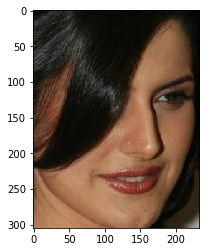

In [7]:
trainX,trainY = load_dataset(BASE+'Indian-celebrities/')
print(trainX.shape,trainY.shape)
#compress the data
savez_compressed(BASE+'Indian-celeb-dataset.npz',trainX,trainY)

# 2. Feature Extraction

Feature extraction is the basic and most important initializing step for face recognition. It extracts the biological components of your face. These biological components are the features of your face which differ from person to person. There are various methods which extract various combination of features, commonly known as nodal points. No two people can have all the nodal points similar to each other except for identical twins.

##### We will be using the FaceNet Keras Model.

In [8]:
from numpy import load
from numpy import asarray
from numpy import expand_dims
from numpy import savez_compressed
from numpy import reshape
from keras.models import load_model 

### 2.1 Generalize the data and extract the embeddings

In [9]:
def extract_embeddings(model,face_pixels):
    face_pixels = face_pixels.astype('float32')  #convert the entire data to float32(base)
    mean = face_pixels.mean()                    #evaluate the mean of the data
    std  = face_pixels.std()                     #evaluate the standard deviation of the data
    face_pixels = (face_pixels - mean)/std       
    samples = expand_dims(face_pixels,axis=0)    #expand the dimension of data 
    yhat = model.predict(samples)
    return yhat[0]

### 2.2 load the compressed dataset and facenet keras model

In [11]:
data = load(BASE+'Indian-celeb-dataset.npz')
trainx, trainy = data['arr_0'],data['arr_1']
print(trainx.shape, trainy.shape)
model = load_model(BASE+'keras-facenet/model/facenet_keras.h5')
model.load_weights(BASE+'keras-facenet/weights/facenet_keras_weights.h5')

(1544, 160, 160, 3) (1544,)


W0116 14:05:19.771148 47190165414976 hdf5_format.py:187] No training configuration found in the save file, so the model was *not* compiled. Compile it manually.


### 2.3 get the face embeddings

In [12]:
new_trainx = list()
for train_pixels in trainx:
    embeddings = extract_embeddings(model,train_pixels)
    new_trainx.append(embeddings)
new_trainx = asarray(new_trainx)             #convert the embeddings into numpy array
print(new_trainx.shape)

(1544, 128)


### 2.4 Compress the 128 embeddings of each face 

In [13]:
savez_compressed('Indian-celeb-embeddings.npz',new_trainx,trainy)

# 3. Load Test data for Classification Model

In [32]:
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
from numpy import array
from mtcnn.mtcnn import MTCNN
from keras.models import load_model
from numpy import expand_dims
from numpy import reshape
from numpy import load
from numpy import max
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

### 3.1 Extract Face for classifier

In [45]:
def extract_image(image):
    img1 = Image.open(image)
    img1 = img1.convert('RGB')
    pixels = asarray(img1)
    detector = MTCNN()
    f = detector.detect_faces(pixels)
    x1,y1,w,h = f[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2 = abs(x1+w)
    y2 = abs(y1+h)
    store_face = pixels[y1:y2,x1:x2]
    image1 = Image.fromarray(store_face,'RGB')
    image1 = image1.resize((160,160))
    face_array = asarray(image1)
    return face_array

### 3.2 Extracting embeddings

In [46]:
def extract_embeddings(model,face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean = face_pixels.mean()
    std  = face_pixels.std()
    face_pixels = (face_pixels - mean)/std
    samples = expand_dims(face_pixels,axis=0)
    yhat = model.predict(samples)
    return yhat[0]

### 3.3 Load an image (that will be classified) and reshape the image

In [59]:
Img = BASE+'bashar5.jpg'
#plt.imshow(Img)
face = extract_image(Img)
testx = asarray(face)
testx = testx.reshape(-1,160,160,3)
print("Input test data shape: ",testx.shape)

W0116 14:15:27.609743 47190165414976 def_function.py:120] 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af41b514378> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W0116 14:15:27.769349 47190165414976 def_function.py:120] 6 out of the last 19 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2af41b514378> triggered tf.function retracing.

Input test data shape:  (1, 160, 160, 3)


### 3.4 find embeddings

In [60]:
model = load_model(BASE+'keras-facenet/model/facenet_keras.h5')
model.load_weights(BASE+'keras-facenet/weights/facenet_keras_weights.h5')
new_testx = list()
for test_pixels in testx:
    embeddings = extract_embeddings(model,test_pixels)
    new_testx.append(embeddings)
new_testx = asarray(new_testx)  
print("Input test embedding shape: ",new_testx.shape)

W0116 14:15:34.185181 47190165414976 hdf5_format.py:187] No training configuration found in the save file, so the model was *not* compiled. Compile it manually.


Input test embedding shape:  (1, 128)


# 4. Train Feature-based Classifier Model

Feature-based classification is a geometry-based or template-based algorithm used to classify the features of the test data among different classes of facial features in the training data. These template-based classifications are possible using various statistical approaches.

##### We will be using the SVM method.

In [61]:
data1 = load(BASE+'Indian-celeb-dataset.npz')
train_x,train_y = data1['arr_0'],data1['arr_1']

In [62]:
data = load(BASE+'Indian-celeb-embeddings.npz')
trainx,trainy= data['arr_0'],data['arr_1']
print("Loaded data: Train=%d , Test=%d"%(trainx.shape[0],new_testx.shape[0]))

Loaded data: Train=1544 , Test=1


### 4.1 normalize the input data

In [63]:
in_encode = Normalizer(norm='l2')
trainx = in_encode.transform(trainx)
new_testx = in_encode.transform(new_testx)

### 4.2 create a label vector

In [64]:
new_testy = trainy 
out_encode = LabelEncoder()
out_encode.fit(trainy)
trainy = out_encode.transform(trainy)
new_testy = out_encode.transform(new_testy)

### 4.3 define and fit svm classifier model 

In [65]:
model =SVC(kernel='linear', probability=True)
model.fit(trainx,trainy)

SVC(kernel='linear', probability=True)

# 5. Test model

### 5.1 make prediction

In [66]:
predict_train = model.predict(trainx)
predict_test = model.predict(new_testx)

### 5.2 get the confidence score

In [67]:
probability = model.predict_proba(new_testx)
confidence = max(probability)
print(confidence)

0.08007795091234207


### 5.3 Accuracy

In [68]:
acc_train = accuracy_score(trainy,predict_train)
print(acc_train)

0.9987046632124352


### 5.4 Display

Text(0.5, 0, 'Predicted Data')

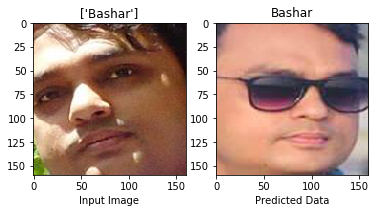

In [69]:
trainy_list = list(trainy)
p=int(predict_test)
if p in trainy_list:
    val = trainy_list.index(p)
#display Input Image
plt.subplot(1,2,1)
plt.imshow(face)
predict_test = out_encode.inverse_transform(predict_test)
plt.title(predict_test)
plt.xlabel("Input Image")
#display Predicated data
plt.subplot(1,2,2)
plt.imshow(train_x[val])
trainy = out_encode.inverse_transform(trainy)
plt.title(trainy[val])
plt.xlabel("Predicted Data")

Reference:

[1] https://medium.com/clique-org/how-to-create-a-face-recognition-model-using-facenet-keras-fd65c0b092f1

[2] https://machinelearningmastery.com/how-to-develop-a-face-recognition-system-using-facenet-in-keras-and-an-svm-classifier/